# EDA RECUPERACIÓN 
## Centros Especialización New York
Existen varios centros especializados de educación (alto rendimiento) en la ciudad de Nueva York, a los que pueden acceder estudiantes tras superar el colegio. En estos centros se ofrece a los alumnos asignaturas avanzadas en arte, música o matemáticas.

El acceso a los centros de especialización ha sido siempre motivo de debate en al ciudad, puesto que se presupone que existe un trato favorable a estudiantes de raza blanca, en detrimento de latinos y negros.

¿Cómo es el proceso de admisión? Lo primero, los alumnos eligen los centros en un ranking. Después realizan un examen (SHSAT), y en función de una notas de corte, se reparten los estudiantes en los distintos centros. Las notas las establece cada centro, y cambian todos los años, dependiendo de la cantidad de plazas disponibles y el número de aplicaciones. **El problema reside en que no se publican esas notas de corte**, y se sospecha que los criterios no san tan objetivos.

[Noticia NYTimes](https://www.nytimes.com/2018/06/21/nyregion/what-is-the-shsat-exam-and-why-does-it-matter.html)

Por tanto, nos encontramos ante la siguiente problemática:
1. Bajo número de estudiantes negros y latinos en centros de especialización
2. Sólo el 10% de los colegios de Nueva York reciben ofertas de centros de especialización, aún habiendo un 67% de estudiantes negros y latinos en Nueva York.
3. Los asiáticos suponen un 62% de los estudiantes de los centros de especialización, aún habiendo únicamente un 16% de estudiantes asiáticos en los colegios.
4. Los blancos suponen un 24% de los estudiantes de los centros de especialización, aún habiendo únicamente un 15% de estudiantes blancos en los colegios.

**El objetivo de este ejecicio es realizar un análisis exploratorio de datos para determinar el estado de las ayudas y necesidades de los colegios de Nueva York, y con ello poder tomar decisiones BASADAS EN LOS DATOS. Para el análisis utilizarás datos como las localizaciones geográficas de los colegios, pertenencia comunitaria, raza de los estudiantes y nivel académico.**

Por tanto, consideraremos las siguientes hipótesis que habrá que razonar con los datos disponibles:
1. Si un colegio pertenece o no a una comunidad tiene impacto en las ayudas económicas recibidas.
2. Hay centros con mayoría de estudiantes hispanos o negros que tienen más necesidades económicas que los centros con mayoría de raza blanca.
3. La localización de los colegios está afectando a las ayudas.
4. Los centros con mayores necesidades tienen un % de asistencia a clase más bajo.



<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Map_of_New_York_Economic_Regions.svg/2000px-Map_of_New_York_Economic_Regions.svg.png'/>

Para contrastar estas hipótesis, tendrás que llevar a cabo los siguientes pasos en la analítica. Comenta qué observas en cada punto

1. Leer los datasets, haz las limpiezas pertinentes y obtén sus estadísticos básicos.

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import seaborn.objects as so
import folium
%matplotlib inline
dataset1=pd.read_csv("2016 School Explorer.csv")
dataset2=pd.read_csv("D5 SHSAT Registrations and Testers.csv")








In [50]:
dataset2

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14
...,...,...,...,...,...,...,...
135,84M709,Harlem Village Academy Charter School,2016,9,42,1,1
136,84M726,KIPP STAR College Prep Charter School,2013,8,75,74,29
137,84M726,KIPP STAR College Prep Charter School,2014,8,71,74,19
138,84M726,KIPP STAR College Prep Charter School,2015,8,84,84,29


In [2]:
pd.options.display.max_columns = None
dataset1.head(5)


,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [3]:
print(dataset1['Address (Full)'].unique())

['333 E 4TH ST NEW YORK, NY 10009' '185 1ST AVE NEW YORK, NY 10003'
 '166 ESSEX ST NEW YORK, NY 10002' ... '1525 BROOK AVE BRONX, NY 10457'
 '3740 BAYCHESTER AVE ANNEX BRONX, NY 10466'
 '950 LONGFELLOW AVE BRONX, NY 10474']


In [4]:
columns_list = dataset1.columns.tolist()
columns_list

['Adjusted Grade',
 'New?',
 'Other Location Code in LCGMS',
 'School Name',
 'SED Code',
 'Location Code',
 'District',
 'Latitude',
 'Longitude',
 'Address (Full)',
 'City',
 'Zip',
 'Grades',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'School Income Estimate',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency',
 'Grade 3 ELA - All Students Tested',
 'Grade 3 ELA 4s - All S

In [5]:
dataset2

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14
...,...,...,...,...,...,...,...
135,84M709,Harlem Village Academy Charter School,2016,9,42,1,1
136,84M726,KIPP STAR College Prep Charter School,2013,8,75,74,29
137,84M726,KIPP STAR College Prep Charter School,2014,8,71,74,19
138,84M726,KIPP STAR College Prep Charter School,2015,8,84,84,29


In [6]:
dataset1['School Income Estimate']=dataset1['School Income Estimate'].str.replace('$','')
dataset1['School Income Estimate']=dataset1['School Income Estimate'].str.replace(',','')
dataset1['School Income Estimate']=dataset1['School Income Estimate'].astype('float64')


C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [7]:
dataset1['Economic Need Index'].fillna(dataset1['Economic Need Index'].mean(), inplace=True)
dataset1['School Income Estimate'].fillna(dataset1['School Income Estimate'].mean(), inplace=True)
dataset1["Latitude"].fillna(dataset1["Latitude"].mean(), inplace=True)
dataset1["Longitude"].fillna(dataset1["Longitude"].mean(), inplace=True)



Observaciones:

2. Analizar geográficamente las zonas de NY, en función de las necesidades económicas y las estimaciones de ingresos de los colegios. Utiliza un scatter plot, con los ejes de latitud y longitud, con el color del indice de necesidad económica y los tamaños, con los ingresos escolares estimados.

In [8]:
#sns.scatterplot(data=dataset1, x="Latitude", y="Longitude",hue='Economic Need Index',size_norm='School Income Estimate', legend="full")



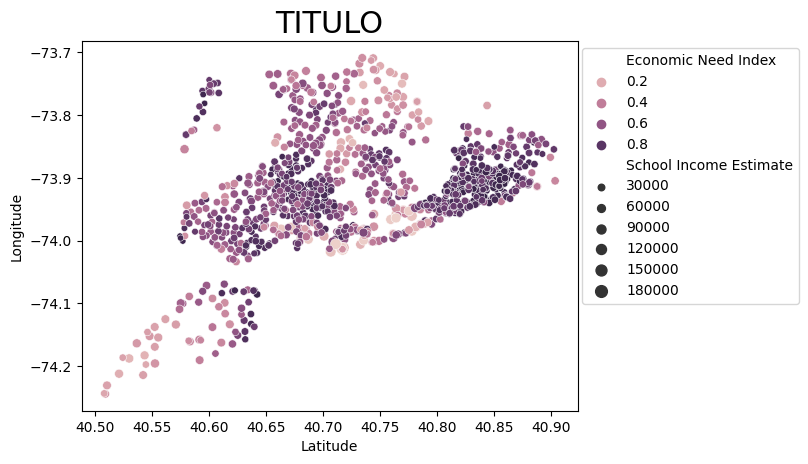

In [9]:
g=sns.scatterplot(data=dataset1, x="Latitude", y="Longitude",hue='Economic Need Index',size='School Income Estimate',legend="auto")

g.legend(loc='upper right', bbox_to_anchor=(1.46, 1))
plt.title("TITULO",fontsize=22);

Observaciones:

3. ¿Cómo se reparten geográficamente los colegios en función de la raza de sus estudiantes? Utiliza gráficas.
    * ¿En qué zonas de NY se encuentran la mayor parte de colegios con estudiantes de raza negra?
    * Lo mismo para raza hispana
    * Raza blanca
    * Asiática

In [10]:


dataset1['Percent White'] = dataset1['Percent White'].astype(str)
dataset1['Percent White'] = dataset1['Percent White'].str.replace('%', '')
dataset1['Percent White'] = dataset1['Percent White'].astype(float)

dataset1['Percent Black'] = dataset1['Percent Black'].astype(str)
dataset1['Percent Black'] = dataset1['Percent Black'].str.replace('%','')
dataset1['Percent Black'] = dataset1['Percent Black'].astype(float)

dataset1['Percent Hispanic'] = dataset1['Percent Hispanic'].astype(str)
dataset1['Percent Hispanic'] = dataset1['Percent Hispanic'].str.replace('%','')
dataset1['Percent Hispanic'] = dataset1['Percent Hispanic'].astype(float)

dataset1['Percent Asian'] = dataset1['Percent Asian'].astype(str)
dataset1['Percent Asian'] = dataset1['Percent Asian'].str.replace('%','')
dataset1['Percent Asian'] = dataset1['Percent Asian'].astype(float)

dataset1['Percent Black / Hispanic'] = dataset1['Percent Black / Hispanic'].astype(str)
dataset1['Percent Black / Hispanic'] = dataset1['Percent Black / Hispanic'].str.replace('%','')
dataset1['Percent Black / Hispanic'] = dataset1['Percent Black / Hispanic'].astype(float)

dataset1['Percent ELL'] = dataset1['Percent ELL'].astype(str)
dataset1['Percent ELL'] = dataset1['Percent ELL'].str.replace('%','')
dataset1['Percent ELL'] = dataset1['Percent ELL'].astype(float)

grouped_white = dataset1.groupby('City')[['Percent White']].mean()
grouped_white

grouped_black = dataset1.groupby('City')[['Percent Black']].mean()
grouped_black

grouped_asian = dataset1.groupby('City')[['Percent Asian']].mean()
grouped_asian

grouped_hispanic= dataset1.groupby('City')[['Percent Hispanic']].mean()
grouped_hispanic

grouped_black_hispanic= dataset1.groupby('City')[['Percent Black / Hispanic']].mean()
grouped_black_hispanic

grouped_ELL= dataset1.groupby('City')[['Percent ELL']].mean()
grouped_ELL

,Percent ELL
City,
ARVERNE,2.000000
ASTORIA,24.166667
BAYSIDE,7.923077
BELLEROSE,3.000000
BROAD CHANNEL,1.000000
BRONX,16.097643
BROOKLYN,11.172749
CAMBRIA HEIGHTS,2.000000
COLLEGE POINT,20.000000


In [11]:
grouped_asian=grouped_asian.sort_values(by='Percent Asian')
grouped_black=grouped_black.sort_values(by='Percent Black')
grouped_hispanic=grouped_hispanic.sort_values(by='Percent Hispanic')
grouped_white=grouped_white.sort_values(by='Percent White')
grouped_ELL=grouped_ELL.sort_values(by='Percent ELL')

print(grouped_asian)
print(grouped_black)
print(grouped_hispanic)
print(grouped_white)
print(grouped_ELL)

                     Percent Asian
City                              
BROAD CHANNEL             0.000000
ROSEDALE                  1.500000
SAINT ALBANS              1.600000
SPRINGFIELD GARDENS       1.818182
ARVERNE                   2.500000
FAR ROCKAWAY              2.846154
CAMBRIA HEIGHTS           3.000000
ROCKAWAY BEACH            3.000000
BRONX                     3.080808
HOWARD BEACH              5.666667
CORONA                    5.777778
MIDDLE VILLAGE            6.750000
ROCKAWAY PARK             7.000000
STATEN ISLAND             7.266667
NEW YORK                  9.163793
GLENDALE                  9.400000
RIDGEWOOD                 9.428571
BROOKLYN                  9.939173
EAST ELMHURST            13.333333
HOLLIS                   14.250000
WOODHAVEN                16.333333
JAMAICA                  21.187500
JACKSON HEIGHTS          21.875000
KEW GARDENS              22.000000
LONG ISLAND CITY         22.333333
REGO PARK                23.000000
MASPETH             

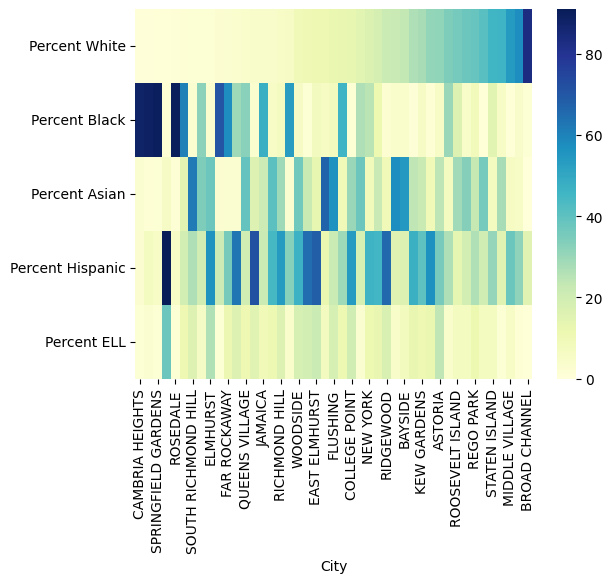

In [12]:
result = pd.concat([grouped_white, grouped_black, grouped_asian, grouped_hispanic, grouped_ELL], axis=1, join='inner')
result.reset_index(inplace=True)

sns.heatmap(result.set_index('City').T, cmap='YlGnBu')
plt.show();


Observaciones:

4. Analiza las distribuciones de los % de cada raza. ¿Qué raza o razas dirías que predomina en los colegios de NY? Utiliza gráficas

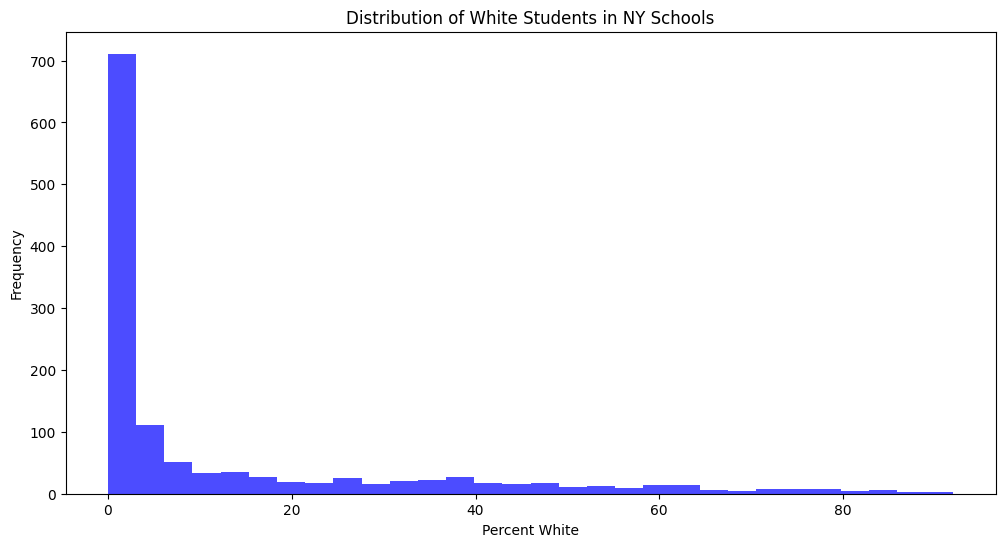

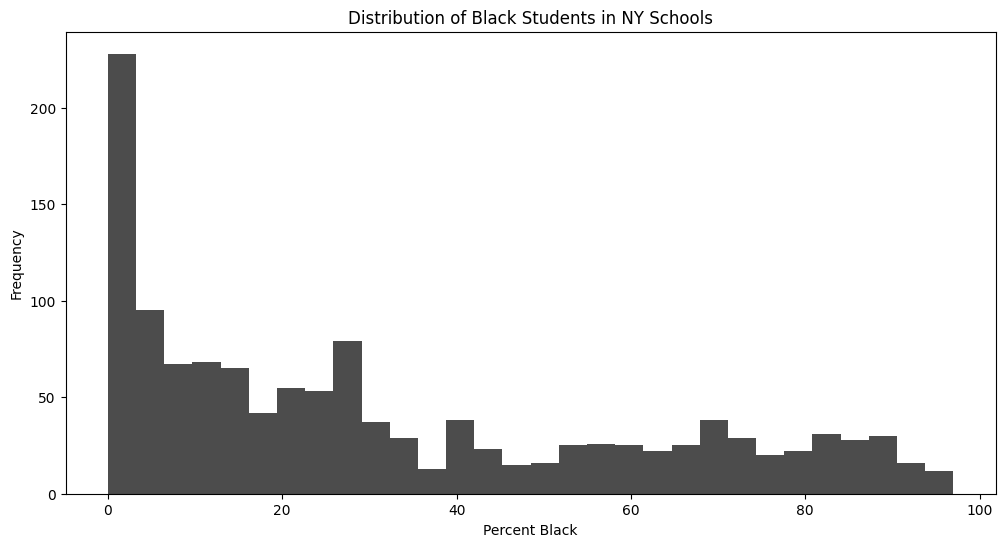

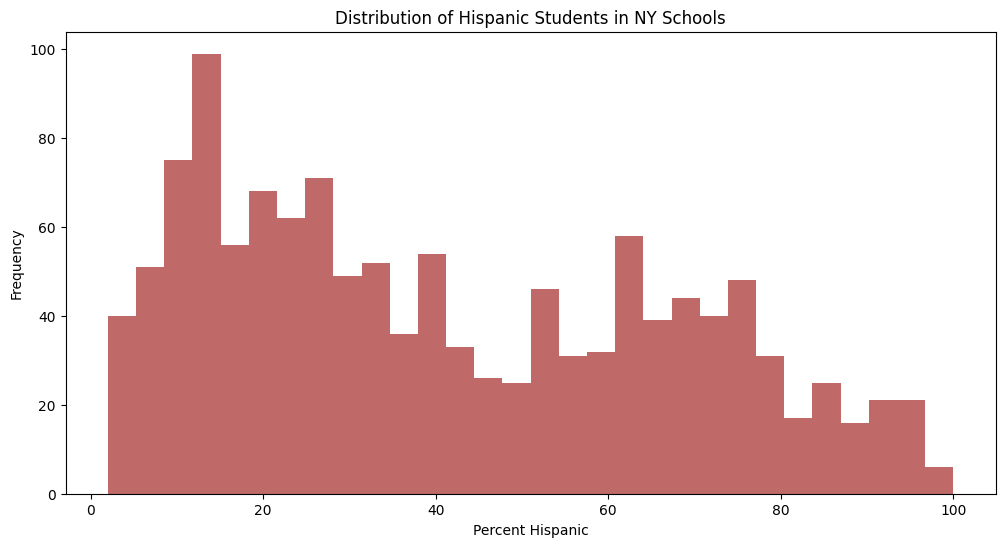

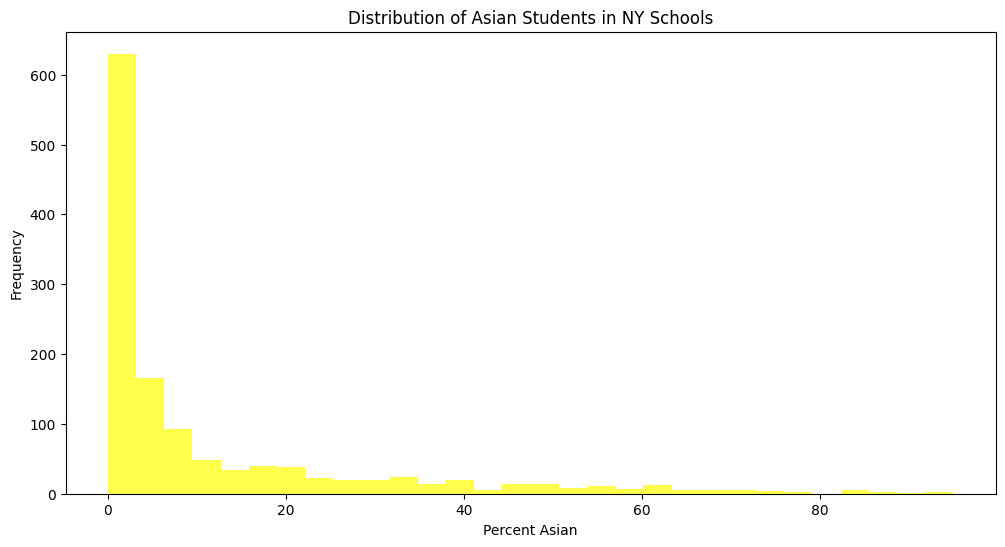

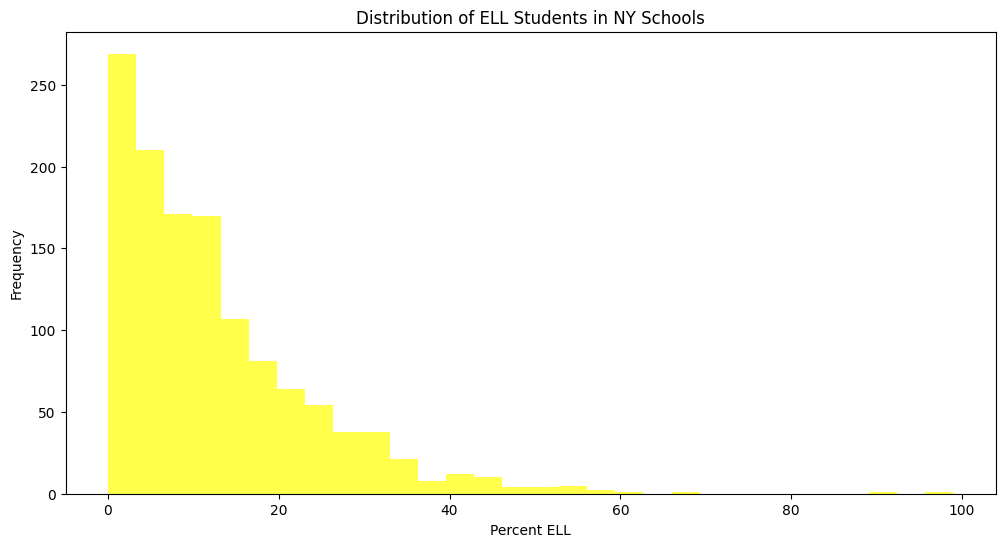

In [13]:
plt.figure(figsize=(12,6))
plt.hist(dataset1['Percent White'], bins = 30, color = 'blue', alpha = 0.7)
plt.xlabel('Percent White')
plt.ylabel('Frequency')
plt.title('Distribution of White Students in NY Schools')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(dataset1['Percent Black'], bins = 30, color = 'black', alpha = 0.7)
plt.xlabel('Percent Black')
plt.ylabel('Frequency')
plt.title('Distribution of Black Students in NY Schools')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(dataset1['Percent Hispanic'], bins = 30, color = 'brown', alpha = 0.7)
plt.xlabel('Percent Hispanic')
plt.ylabel('Frequency')
plt.title('Distribution of Hispanic Students in NY Schools')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(dataset1['Percent Asian'], bins = 30, color = 'yellow', alpha = 0.7)
plt.xlabel('Percent Asian')
plt.ylabel('Frequency')
plt.title('Distribution of Asian Students in NY Schools')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(dataset1['Percent ELL'], bins = 30, color = 'yellow', alpha = 0.7)
plt.xlabel('Percent ELL')
plt.ylabel('Frequency')
plt.title('Distribution of ELL Students in NY Schools')
plt.show()




In [14]:
'''Si hay muchos valores concentrados en valores muy bajos del índice porcentual, significa que la mayoría
de los colegios tienen un porcentaje bajo de estudiantes de esa raza específica. 
Esto podría indicar una falta de diversidad en esa área en particular o una falta de representación de esa 
raza en los colegios de esa área.'''

'Si hay muchos valores concentrados en valores muy bajos del índice porcentual, significa que la mayoría\nde los colegios tienen un porcentaje bajo de estudiantes de esa raza específica. \nEsto podría indicar una falta de diversidad en esa área en particular o una falta de representación de esa \nraza en los colegios de esa área.'

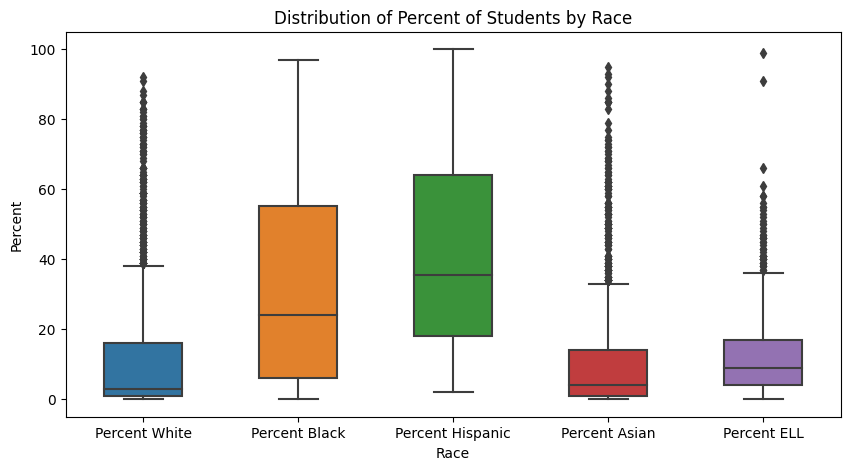

In [15]:

plt.figure(figsize=(10,5))
sns.boxplot(data=dataset1[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent ELL']], width=0.5)
plt.title('Distribution of Percent of Students by Race')
plt.xlabel('Race')
plt.ylabel('Percent')
plt.show()

In [16]:
'''Los grupos percent Black y percent Hispanic no tienen valores atípicos, esto puede significar que
la distribución de estos porcentajes entre los colegios de NY es bastante homogénea y no hay 
colegios con una gran diferencia en la proporción de estudiantes de estas razas en comparación con el resto de los colegios. 
Esto puede indicar que la presencia de estudiantes de estas razas en los colegios de NY es 
relativamente estable y no hay una gran variación en su distribución geográfica.'''

'Los grupos percent Black y percent Hispanic no tienen valores atípicos, esto puede significar que\nla distribución de estos porcentajes entre los colegios de NY es bastante homogénea y no hay \ncolegios con una gran diferencia en la proporción de estudiantes de estas razas en comparación con el resto de los colegios. \nEsto puede indicar que la presencia de estudiantes de estas razas en los colegios de NY es \nrelativamente estable y no hay una gran variación en su distribución geográfica.'

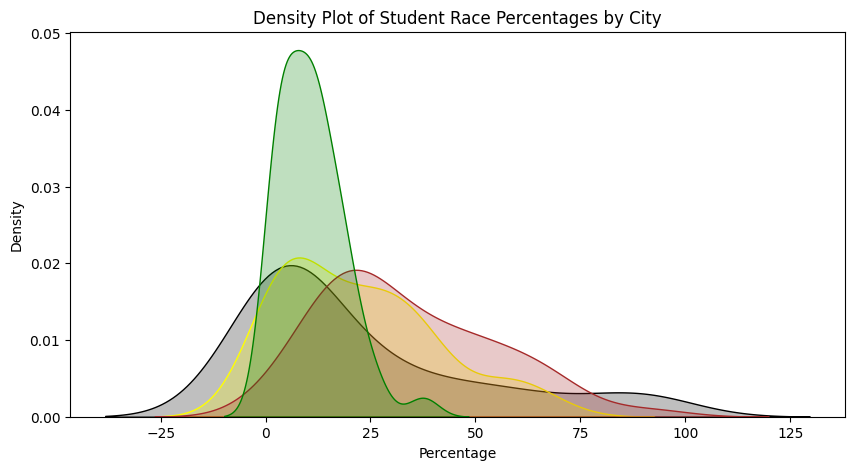

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(grouped_white['Percent White'], label="Percent White", fill=True,color='white')
sns.kdeplot(grouped_black['Percent Black'], label="Percent Black", fill=True,color='black')
sns.kdeplot(grouped_asian['Percent Asian'], label="Percent Asian", fill=True,color='yellow')
sns.kdeplot(grouped_hispanic['Percent Hispanic'], label="Percent Hispanic", fill=True,color='brown')
sns.kdeplot(grouped_ELL['Percent ELL'], label="Percent ELL", fill=True,color='green')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.title('Density Plot of Student Race Percentages by City')
plt.show()

In [18]:
'''Con los gráficos de histograma, box plot y gráfico de densidad se puede observar que la raza predominante en los colegios 
de NY es la raza blanca, seguida de la raza asiática. Los valores de los porcentajes de estudiantes de raza negra y hispana 
son menores en comparación con los de las otras dos razas. Además, se puede observar que la distribución de los porcentajes
de estudiantes de raza negra y hispana es más homogénea en comparación con las otras dos razas. Sin embargo, es importante 
tener en cuenta que este análisis se basa en los datos promedio por ciudad, por lo que puede haber variaciones en las 
distribuciones de las razas en cada colegio individualmente.'''

'Con los gráficos de histograma, box plot y gráfico de densidad se puede observar que la raza predominante en los colegios \nde NY es la raza blanca, seguida de la raza asiática. Los valores de los porcentajes de estudiantes de raza negra y hispana \nson menores en comparación con los de las otras dos razas. Además, se puede observar que la distribución de los porcentajes\nde estudiantes de raza negra y hispana es más homogénea en comparación con las otras dos razas. Sin embargo, es importante \ntener en cuenta que este análisis se basa en los datos promedio por ciudad, por lo que puede haber variaciones en las \ndistribuciones de las razas en cada colegio individualmente.'

Observaciones:

5. ¿Hay alguna relación entre las necesidades económicas de los colegios y la raza de sus estudiantes? ¿Y entre los ingresos y sus razas? Utiliza un mapa de calor con las correlaciones

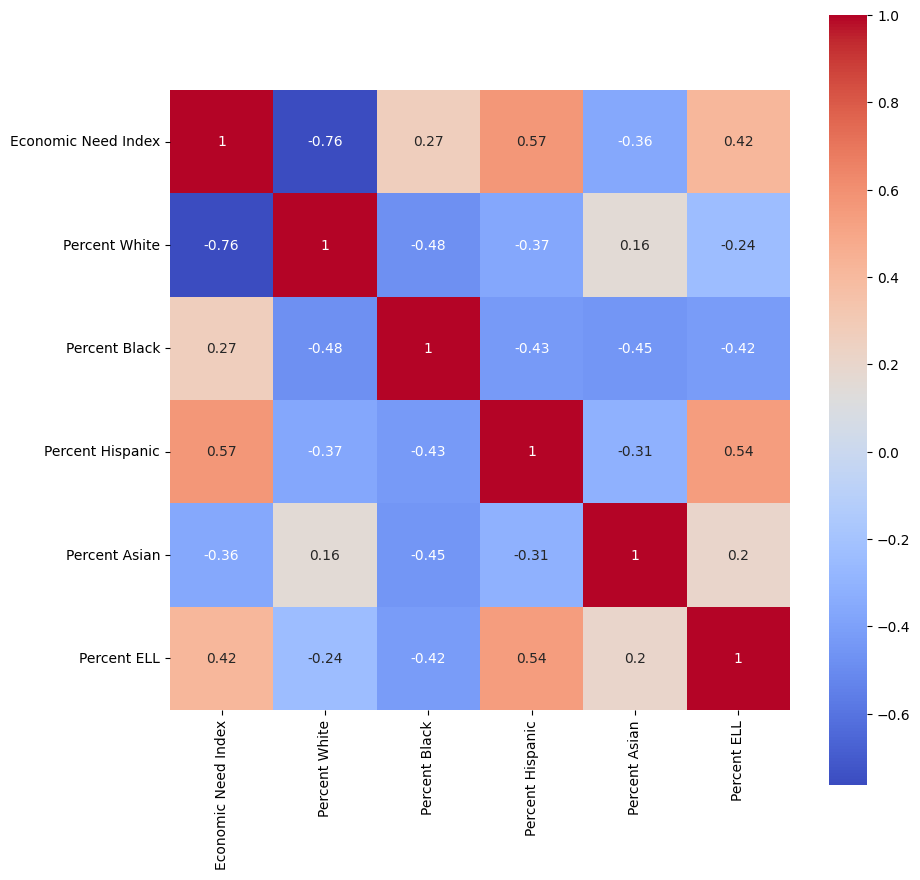

In [19]:
correlations = dataset1[["Economic Need Index","Percent White","Percent Black","Percent Hispanic","Percent Asian","Percent ELL"]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlations,annot=True,cmap='coolwarm',square=True);

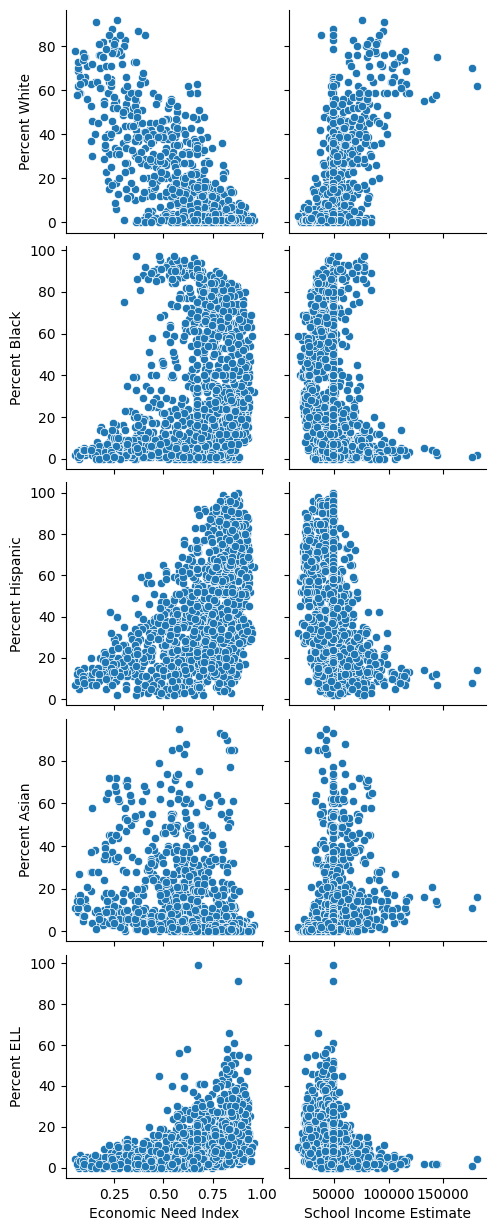

In [20]:
sns.pairplot(data=dataset1, x_vars=['Economic Need Index', 'School Income Estimate'], y_vars=['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent ELL']);

In [21]:
'''Según los datos obtenidos a través de las correlaciones, podría haber una relación débil o moderada entre las necesidades económicas 
de los colegios (Economic Need Index) y la raza de sus estudiantes. Sin embargo, esto no significa necesariamente que haya una relación
causal entre ambos factores. Es importante tener en cuenta que el análisis de correlación solo nos permite identificar una relación
entre dos variables, pero no nos permite determinar la causa de dicha relación. Es posible que existan factores no considerados en el
análisis que estén influyendo en ambas variables.Por otro lado, en cuanto a la relación entre los ingresos y la raza de los 
estudiantes, los datos muestran una correlación débil o moderada.'''

'Según los datos obtenidos a través de las correlaciones, podría haber una relación débil o moderada entre las necesidades económicas \nde los colegios (Economic Need Index) y la raza de sus estudiantes. Sin embargo, esto no significa necesariamente que haya una relación\ncausal entre ambos factores. Es importante tener en cuenta que el análisis de correlación solo nos permite identificar una relación\nentre dos variables, pero no nos permite determinar la causa de dicha relación. Es posible que existan factores no considerados en el\nanálisis que estén influyendo en ambas variables.Por otro lado, en cuanto a la relación entre los ingresos y la raza de los \nestudiantes, los datos muestran una correlación débil o moderada.'

Observaciones:

6. Analicemos ahora la asistencia a clase. Supongamos que hay colegios con alta tasa de ausencia (>=30%) y baja tasa de asistencia (<=11%). Utiliza gráficas.
    * ¿Dónde se situan los de alta y baja tasa?
    * ¿Qué % mayoritario de razas tienen ambos grupos?
    * Necesidades económicas y estimación de ingresos de esos colegios.

In [22]:
dataset1['Percent of Students Chronically Absent'] = dataset1['Percent of Students Chronically Absent'].astype(str)
dataset1['Percent of Students Chronically Absent'] = dataset1['Percent of Students Chronically Absent'].str.replace('%','')
dataset1['Percent of Students Chronically Absent'] = dataset1['Percent of Students Chronically Absent'].astype(float)
dataset1['Percent of Students Chronically Absent']

0       18.0
1       30.0
2       20.0
3       28.0
4       23.0
        ... 
1267    13.0
1268    24.0
1269    12.0
1270    12.0
1271    22.0
Name: Percent of Students Chronically Absent, Length: 1272, dtype: float64

In [23]:
high_absence_rate = dataset1[dataset1['Percent of Students Chronically Absent'] >= 30]
low_absence_rate = dataset1[dataset1['Percent of Students Chronically Absent'] <= 11]
print("Colegios con tasas de ausencia superiores al 30%:", high_absence_rate.shape[0])
print("Colegios con tasas de ausencia inferiores al 11%:", low_absence_rate.shape[0])

Colegios con tasas de ausencia superiores al 30%: 330
Colegios con tasas de ausencia inferiores al 11%: 326


In [24]:
import pandas as pd


# Seleccionamos las columnas necesarias
df = dataset1[['School Name', 'Latitude', 'Longitude', 'Percent of Students Chronically Absent','Percent Asian','Percent ELL', 'Percent Black', 'Percent Hispanic', 'Percent White', 'Economic Need Index','School Income Estimate']]

# Creamos los grupos de colegios con alta y baja tasa de ausencia
high_absence_schools = df[df['Percent of Students Chronically Absent'] >= 30]
low_absence_schools = df[df['Percent of Students Chronically Absent'] <= 11]

# Importamos la libreria folium para crear el mapa
import folium

# Crear mapa base
m = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Agregar marcadores para colegios con alta tasa de ausencia
for i, row in high_absence_schools.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=5,
                        color='red',
                        fill=True).add_to(m)

# Agregar marcadores para colegios con baja tasa de ausencia
for i, row in low_absence_schools.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=5,
                        color='blue',
                        fill=True).add_to(m)

m


In [25]:
'''Ahora podemos ver la distribución geográfica de los colegios con alta y baja tasa de ausencia.
 Los marcadores rojos representan los colegios con alta tasa de ausencia y los marcadores azules representan los colegios con baja tasa de ausencia.'''

'Ahora podemos ver la distribución geográfica de los colegios con alta y baja tasa de ausencia.\n Los marcadores rojos representan los colegios con alta tasa de ausencia y los marcadores azules representan los colegios con baja tasa de ausencia.'

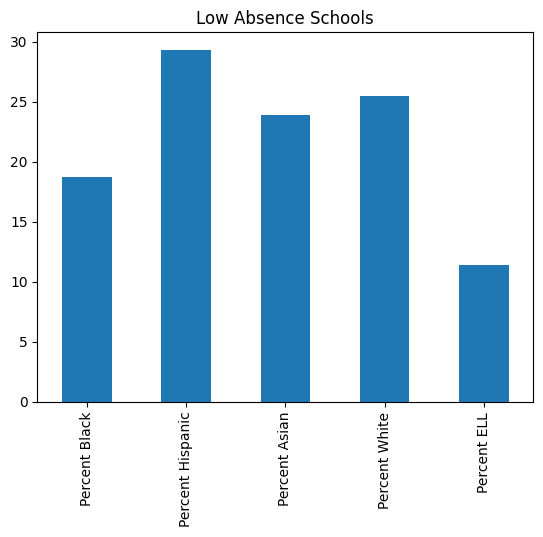

In [26]:
import matplotlib.pyplot as plt

# Obtener distribución de razas promedio para cada grupo
high_absence_race_dist = high_absence_schools[['Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White','Percent ELL']].mean()
low_absence_race_dist = low_absence_schools[['Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White','Percent ELL']].mean()

# Graficar distribución de razas para cada grupo

low_absence_race_dist.plot(kind='bar', title='Low Absence Schools')
plt.show()

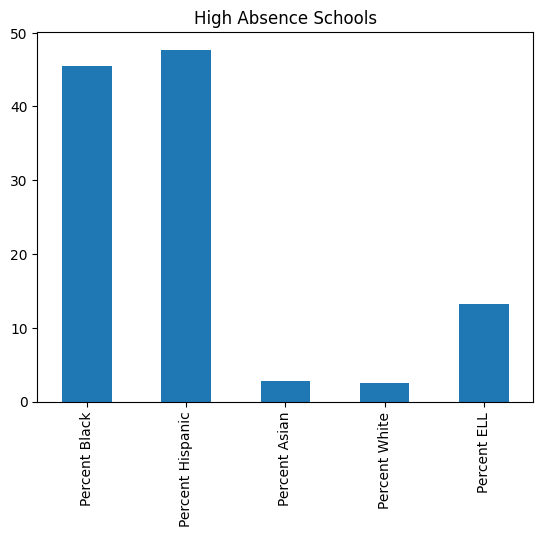

In [27]:
high_absence_race_dist.plot(kind='bar', title='High Absence Schools')
plt.show()

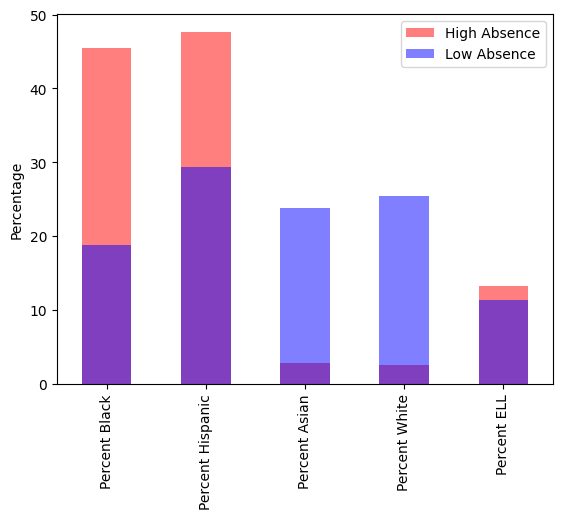

In [28]:
# Comparar distribución de razas entre los dos grupos
race_cols = ['Percent Black', 'Percent Hispanic', 'Percent Asian', 'Percent White','Percent ELL']
high_absence_race_dist = high_absence_schools[race_cols].mean()
low_absence_race_dist = low_absence_schools[race_cols].mean()

# Graficar distribución de razas
high_absence_race_dist.plot(kind='bar', color='red', alpha=0.5, label='High Absence')
low_absence_race_dist.plot(kind='bar', color='blue', alpha=0.5, label='Low Absence')
plt.ylabel('Percentage')
plt.legend()
plt.show()

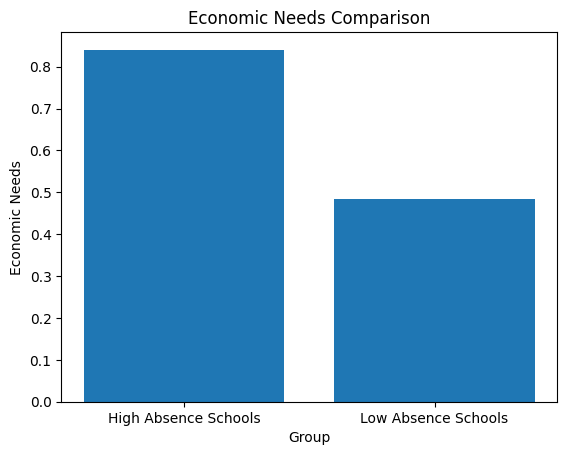

In [29]:
import matplotlib.pyplot as plt

# Obtener valores promedio de necesidades económicas para cada grupo
high_absence_economic_needs = high_absence_schools['Economic Need Index'].mean()
low_absence_economic_needs = low_absence_schools['Economic Need Index'].mean()

# Crear gráfico de barra
plt.bar(['High Absence Schools', 'Low Absence Schools'], [high_absence_economic_needs, low_absence_economic_needs])
plt.xlabel('Group')
plt.ylabel('Economic Needs')
plt.title('Economic Needs Comparison')
plt.show()

In [30]:
# Calcular promedio de necesidad económica para colegios con alta tasa de ausencia
high_absence_economic_need = high_absence_schools['Economic Need Index'].mean()

# Calcular promedio de necesidad económica para colegios con baja tasa de ausencia
low_absence_economic_need = low_absence_schools['Economic Need Index'].mean()

# Comparar los promedios
print("Promedio de necesidad económica para colegios con alta tasa de ausencia: ", high_absence_economic_need)
print("Promedio de necesidad económica para colegios con baja tasa de ausencia: ", low_absence_economic_need)

Promedio de necesidad económica para colegios con alta tasa de ausencia:  0.8406242424242423
Promedio de necesidad económica para colegios con baja tasa de ausencia:  0.48486196319018404


In [31]:
# Calcular promedio de ingresos para colegios con alta tasa de ausencia
high_absence_income = high_absence_schools['School Income Estimate'].mean()

# Calcular promedio de ingresos para colegios con baja tasa de ausencia
low_absence_income = low_absence_schools['School Income Estimate'].mean()

# Comparar los promedios
print("Promedio de ingresos para colegios con alta tasa de ausencia: ", high_absence_income)
print("Promedio de ingresos para colegios con baja tasa de ausencia: ", low_absence_income)

Promedio de ingresos para colegios con alta tasa de ausencia:  38012.876540473226
Promedio de ingresos para colegios con baja tasa de ausencia:  59314.5045776956


<AxesSubplot:xlabel='Group', ylabel='Economic Need Index'>

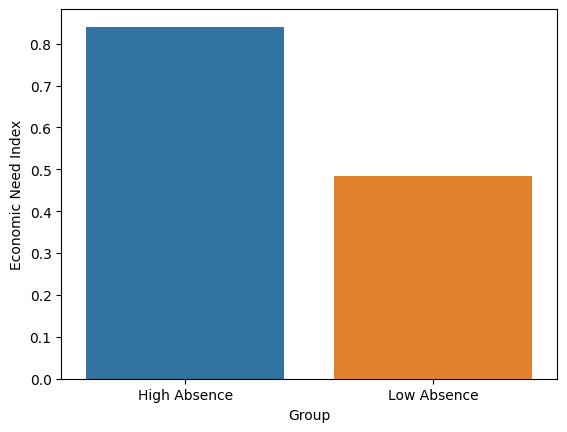

In [32]:
high_absence_mean_economic_need = high_absence_schools['Economic Need Index'].mean()
low_absence_mean_economic_need = low_absence_schools['Economic Need Index'].mean()

bar_chart = pd.DataFrame({'Group': ['High Absence', 'Low Absence'],
                         'Economic Need Index': [high_absence_mean_economic_need, low_absence_mean_economic_need]})

sns.barplot(x='Group', y='Economic Need Index', data=bar_chart)

Promedio de necesidad económica de colegios con alta tasa de ausencia: 38012.876540473226
Promedio de necesidad económica de colegios con baja tasa de ausencia: 59314.5045776956


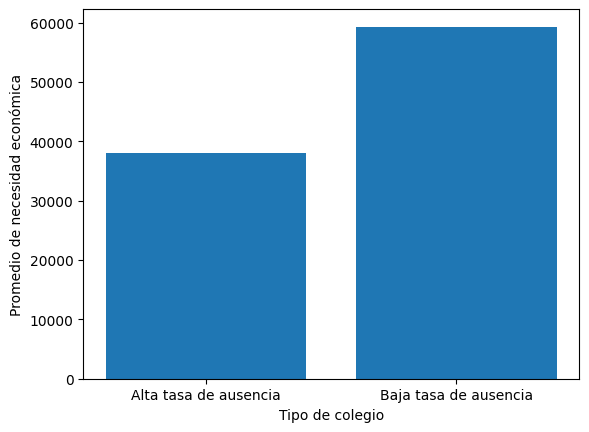

In [33]:
high_absence_mean_income = high_absence_schools['School Income Estimate'].mean()
low_absence_mean_income = low_absence_schools['School Income Estimate'].mean()

print(f"Promedio de necesidad económica de colegios con alta tasa de ausencia: {high_absence_mean_income}")
print(f"Promedio de necesidad económica de colegios con baja tasa de ausencia: {low_absence_mean_income}")


income_data = {'Alta tasa de ausencia': high_absence_mean_income,
'Baja tasa de ausencia': low_absence_mean_income}

plt.bar(income_data.keys(), income_data.values())
plt.xlabel('Tipo de colegio')
plt.ylabel('Promedio de necesidad económica')
plt.show()


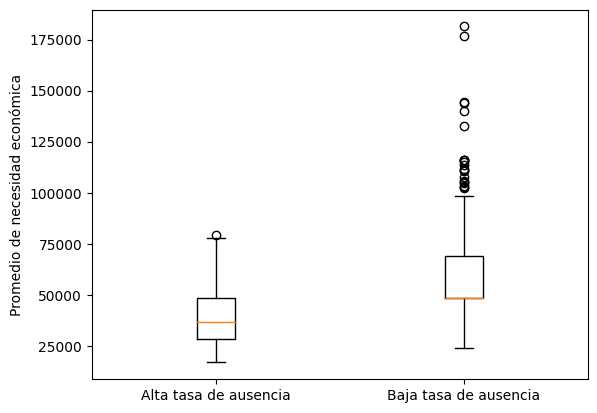

In [34]:
plt.boxplot([high_absence_schools['School Income Estimate'], low_absence_schools['School Income Estimate']], labels=['Alta tasa de ausencia', 'Baja tasa de ausencia'])
plt.ylabel('Promedio de necesidad económica')
plt.show()

Observaciones:

7. Vamos a analizar el rendimiento académico de los alumnos. Para ello, tendremos que dividir el dataset en colegios donde predominan latinos y negros (>= 70%) vs predominio de asiáticos y blancos. Saca algunos estadísticos y compara en una gráfica las funciones de densidad de ambos grupos, para los scores de matemáticas y ELA (English Language Arts). Utiliza gráficas.

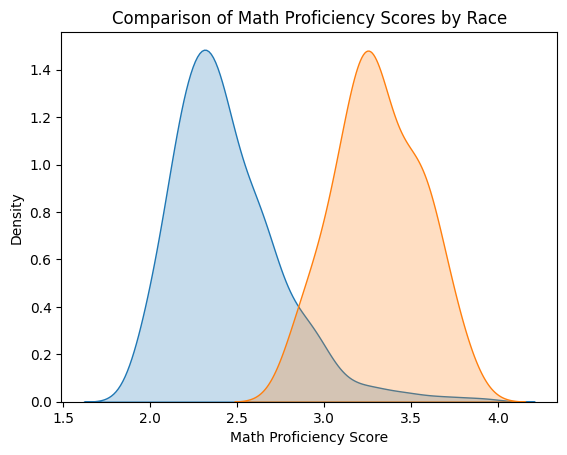

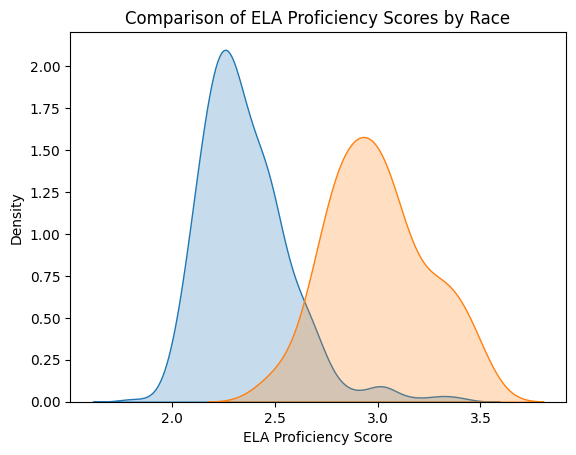

In [35]:
black_hispanic_schools = dataset1[(dataset1['Percent Black'] >= 70) | (dataset1['Percent Hispanic'] >= 70)]
white_asian_schools = dataset1[(dataset1['Percent Asian'] >= 70) | (dataset1['Percent White'] >= 70)]

'''Luego, para comparar las distribuciones de scores de matemáticas y ELA entre los dos grupos:'''

sns.kdeplot(black_hispanic_schools['Average Math Proficiency'], label='Black/Hispanic', fill=True)
sns.kdeplot(white_asian_schools['Average Math Proficiency'], label='White/Asian', fill=True)
plt.xlabel('Math Proficiency Score')
plt.ylabel('Density')
plt.title('Comparison of Math Proficiency Scores by Race')
plt.show()

'''Se puede hacer lo mismo para el score de ELA cambiando la columna 'Average Math Proficiency' por 'Average ELA Proficiency'''

sns.kdeplot(black_hispanic_schools['Average ELA Proficiency'], label='Black/Hispanic', fill=True)
sns.kdeplot(white_asian_schools['Average ELA Proficiency'], label='White/Asian', fill=True)
plt.xlabel('ELA Proficiency Score')
plt.ylabel('Density')
plt.title('Comparison of ELA Proficiency Scores by Race')
plt.show()

In [36]:
print(black_hispanic_schools[['Average Math Proficiency', 'Average ELA Proficiency']].describe())
print(white_asian_schools[['Average Math Proficiency', 'Average ELA Proficiency']].describe())

       Average Math Proficiency  Average ELA Proficiency
count                425.000000               425.000000
mean                   2.442235                 2.356941
std                    0.314430                 0.217970
min                    1.900000                 1.810000
25%                    2.220000                 2.210000
50%                    2.380000                 2.320000
75%                    2.610000                 2.470000
max                    3.930000                 3.400000
       Average Math Proficiency  Average ELA Proficiency
count                 59.000000                59.000000
mean                   3.310169                 3.000678
std                    0.245459                 0.238428
min                    2.810000                 2.490000
25%                    3.140000                 2.835000
50%                    3.280000                 2.980000
75%                    3.515000                 3.120000
max                    3.830000

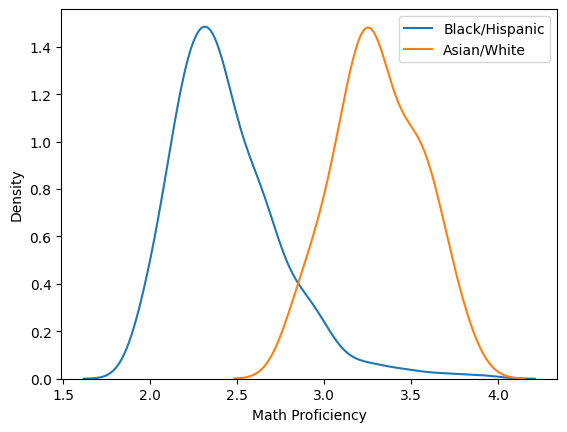

In [37]:
sns.kdeplot(black_hispanic_schools['Average Math Proficiency'], label='Black/Hispanic')
sns.kdeplot(white_asian_schools['Average Math Proficiency'], label='Asian/White')
plt.xlabel('Math Proficiency')
plt.ylabel('Density')
plt.legend()
plt.show()

In [38]:
black_hispanic_schools = dataset1[(dataset1['Percent Black'] + dataset1['Percent Hispanic']) >= 70]
asian_white_schools = dataset1[(dataset1['Percent Black'] + dataset1['Percent Hispanic']) < 70]
dataset1["Ethnicity"] = "Latino/Black"
dataset1.loc[(dataset1["Percent Hispanic"] + dataset1["Percent Black"]) < 70, "Ethnicity"] = "Asian/White"

black_hispanic_schools = dataset1[dataset1["Ethnicity"] == "Latino/Black"]
asian_white_schools = dataset1[dataset1["Ethnicity"] == "Asian/White"]

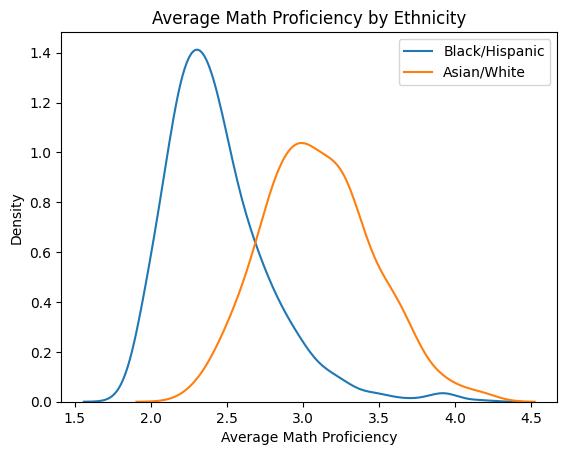

In [39]:
sns.kdeplot(black_hispanic_schools['Average Math Proficiency'], label='Black/Hispanic')
sns.kdeplot(asian_white_schools['Average Math Proficiency'], label='Asian/White')
plt.xlabel('Average Math Proficiency')
plt.ylabel('Density')
plt.title('Average Math Proficiency by Ethnicity')
plt.legend()
plt.show()

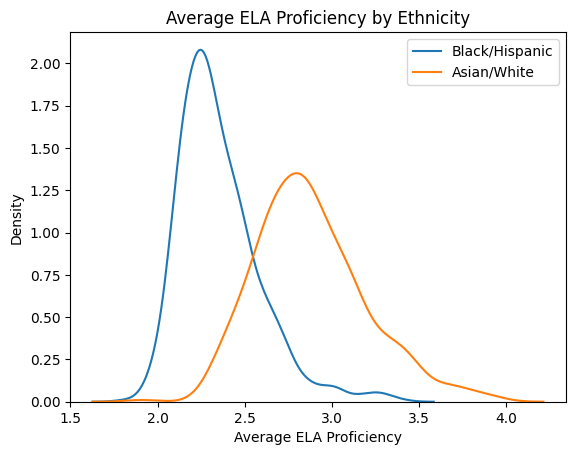

In [40]:
sns.kdeplot(black_hispanic_schools['Average ELA Proficiency'], label='Black/Hispanic')
sns.kdeplot(asian_white_schools['Average ELA Proficiency'], label='Asian/White')
plt.xlabel('Average ELA Proficiency')
plt.ylabel('Density')
plt.title('Average ELA Proficiency by Ethnicity')
plt.legend()
plt.show()

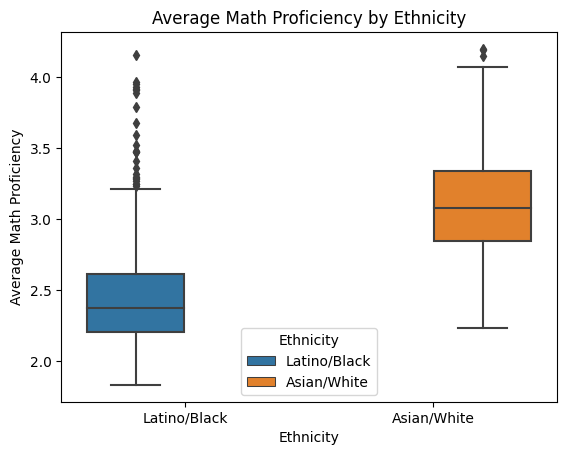

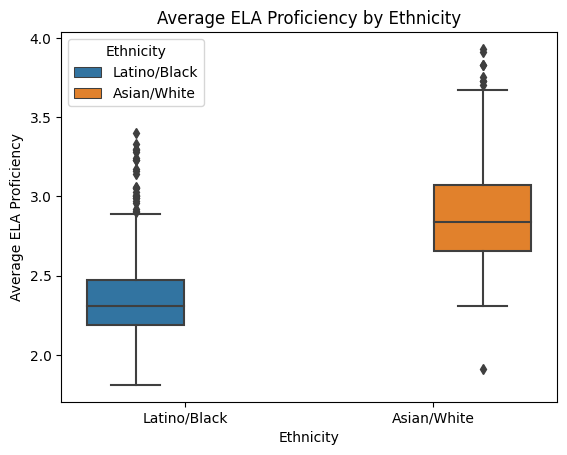

In [41]:
sns.boxplot(x='Ethnicity', y='Average Math Proficiency', data=dataset1, hue='Ethnicity')
plt.title('Average Math Proficiency by Ethnicity')
plt.show()

sns.boxplot(x='Ethnicity', y='Average ELA Proficiency', data=dataset1, hue='Ethnicity')
plt.title('Average ELA Proficiency by Ethnicity')
plt.show()

Observaciones:

8. Comprobaremos ahora la influencia de que un colegio pertenezca o no a una comunidad
    * ¿En qué afecta que el colegio pertenezca a una comunidad? Raza, necesidades económicas, ingresos...
    * Compara mediante funciones de densidad si los colegios comunitarios tienen mayores ingresos.
    * Compara mediante funciones de densidad si los colegios comunitarios tienen mayores necesidades económicas.

In [42]:
community_schools = dataset1[dataset1['Community School?'] == 'Yes']
non_community_schools = dataset1[dataset1['Community School?'] == 'No']

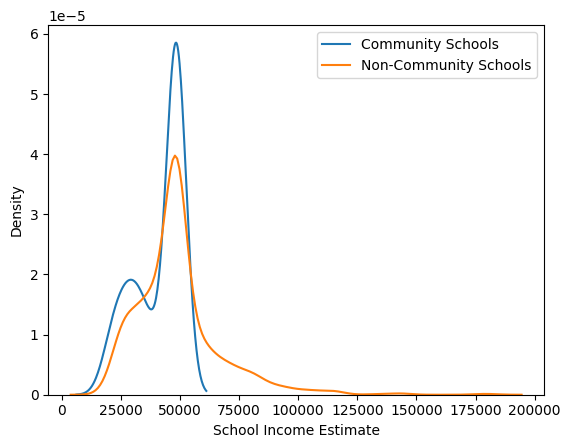

In [43]:
sns.kdeplot(community_schools['School Income Estimate'], label='Community Schools')
sns.kdeplot(non_community_schools['School Income Estimate'], label='Non-Community Schools')
plt.xlabel('School Income Estimate')
plt.ylabel('Density')
plt.legend()
plt.show()


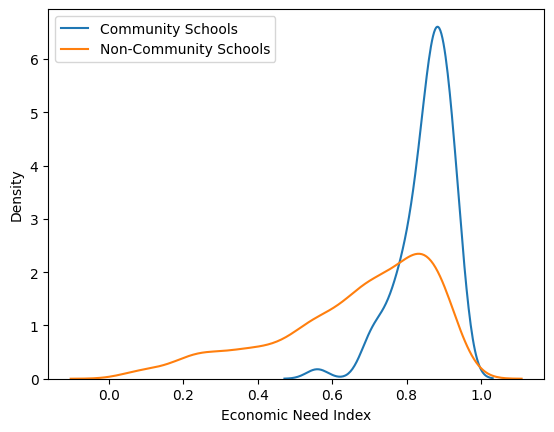

In [44]:
sns.kdeplot(community_schools['Economic Need Index'], label='Community Schools')
sns.kdeplot(non_community_schools['Economic Need Index'], label='Non-Community Schools')
plt.xlabel('Economic Need Index')
plt.ylabel('Density')
plt.legend()
plt.show()

Observaciones:

9. Escoge a las top 10 ciudades con más colegios. Muestra la dispersión de los ingresos estimados de los colegios de cada ciudad con diagramas de caja.
    * Cual es la ciudad con mayor y menor dispersión?
    * En qué ciudades se encuentran que la mitad de los colegios tienen un mínimo de ingresos de 50000.

In [45]:
ciudades = dataset1.groupby('City')['School Income Estimate'].std()
ciudades

City
ARVERNE                 4478.892134
ASTORIA                 6171.533512
BAYSIDE                11992.732621
BELLEROSE               3512.629773
BROAD CHANNEL                   NaN
BRONX                  12103.393831
BROOKLYN               12398.453707
CAMBRIA HEIGHTS         6603.238894
COLLEGE POINT           5837.640240
CORONA                  3316.069823
DOUGLASTON                      NaN
EAST ELMHURST           3602.848148
ELMHURST                2740.739658
FAR ROCKAWAY            8483.415332
FLORAL PARK            18373.087523
FLUSHING               10392.575112
FOREST HILLS           16912.268145
GLENDALE                7415.423569
HOLLIS                  9381.857145
HOWARD BEACH           11253.476632
JACKSON HEIGHTS         5279.209802
JAMAICA                10122.107727
KEW GARDENS                     NaN
LITTLE NECK            19999.121627
LONG ISLAND CITY       13507.508774
MASPETH                 4445.015629
MIDDLE VILLAGE         10001.516739
NEW YORK               

In [46]:

city_income_std = dataset1.groupby('City')['School Income Estimate'].std()


city_income_std = city_income_std.sort_values(ascending=False)


top_10_cities = city_income_std.head(10)


print(top_10_cities)

City
NEW YORK               26447.002189
ROCKAWAY PARK          20414.922049
LITTLE NECK            19999.121627
FLORAL PARK            18373.087523
FOREST HILLS           16912.268145
STATEN ISLAND          16392.111342
LONG ISLAND CITY       13507.508774
SPRINGFIELD GARDENS    13390.162078
BROOKLYN               12398.453707
BRONX                  12103.393831
Name: School Income Estimate, dtype: float64


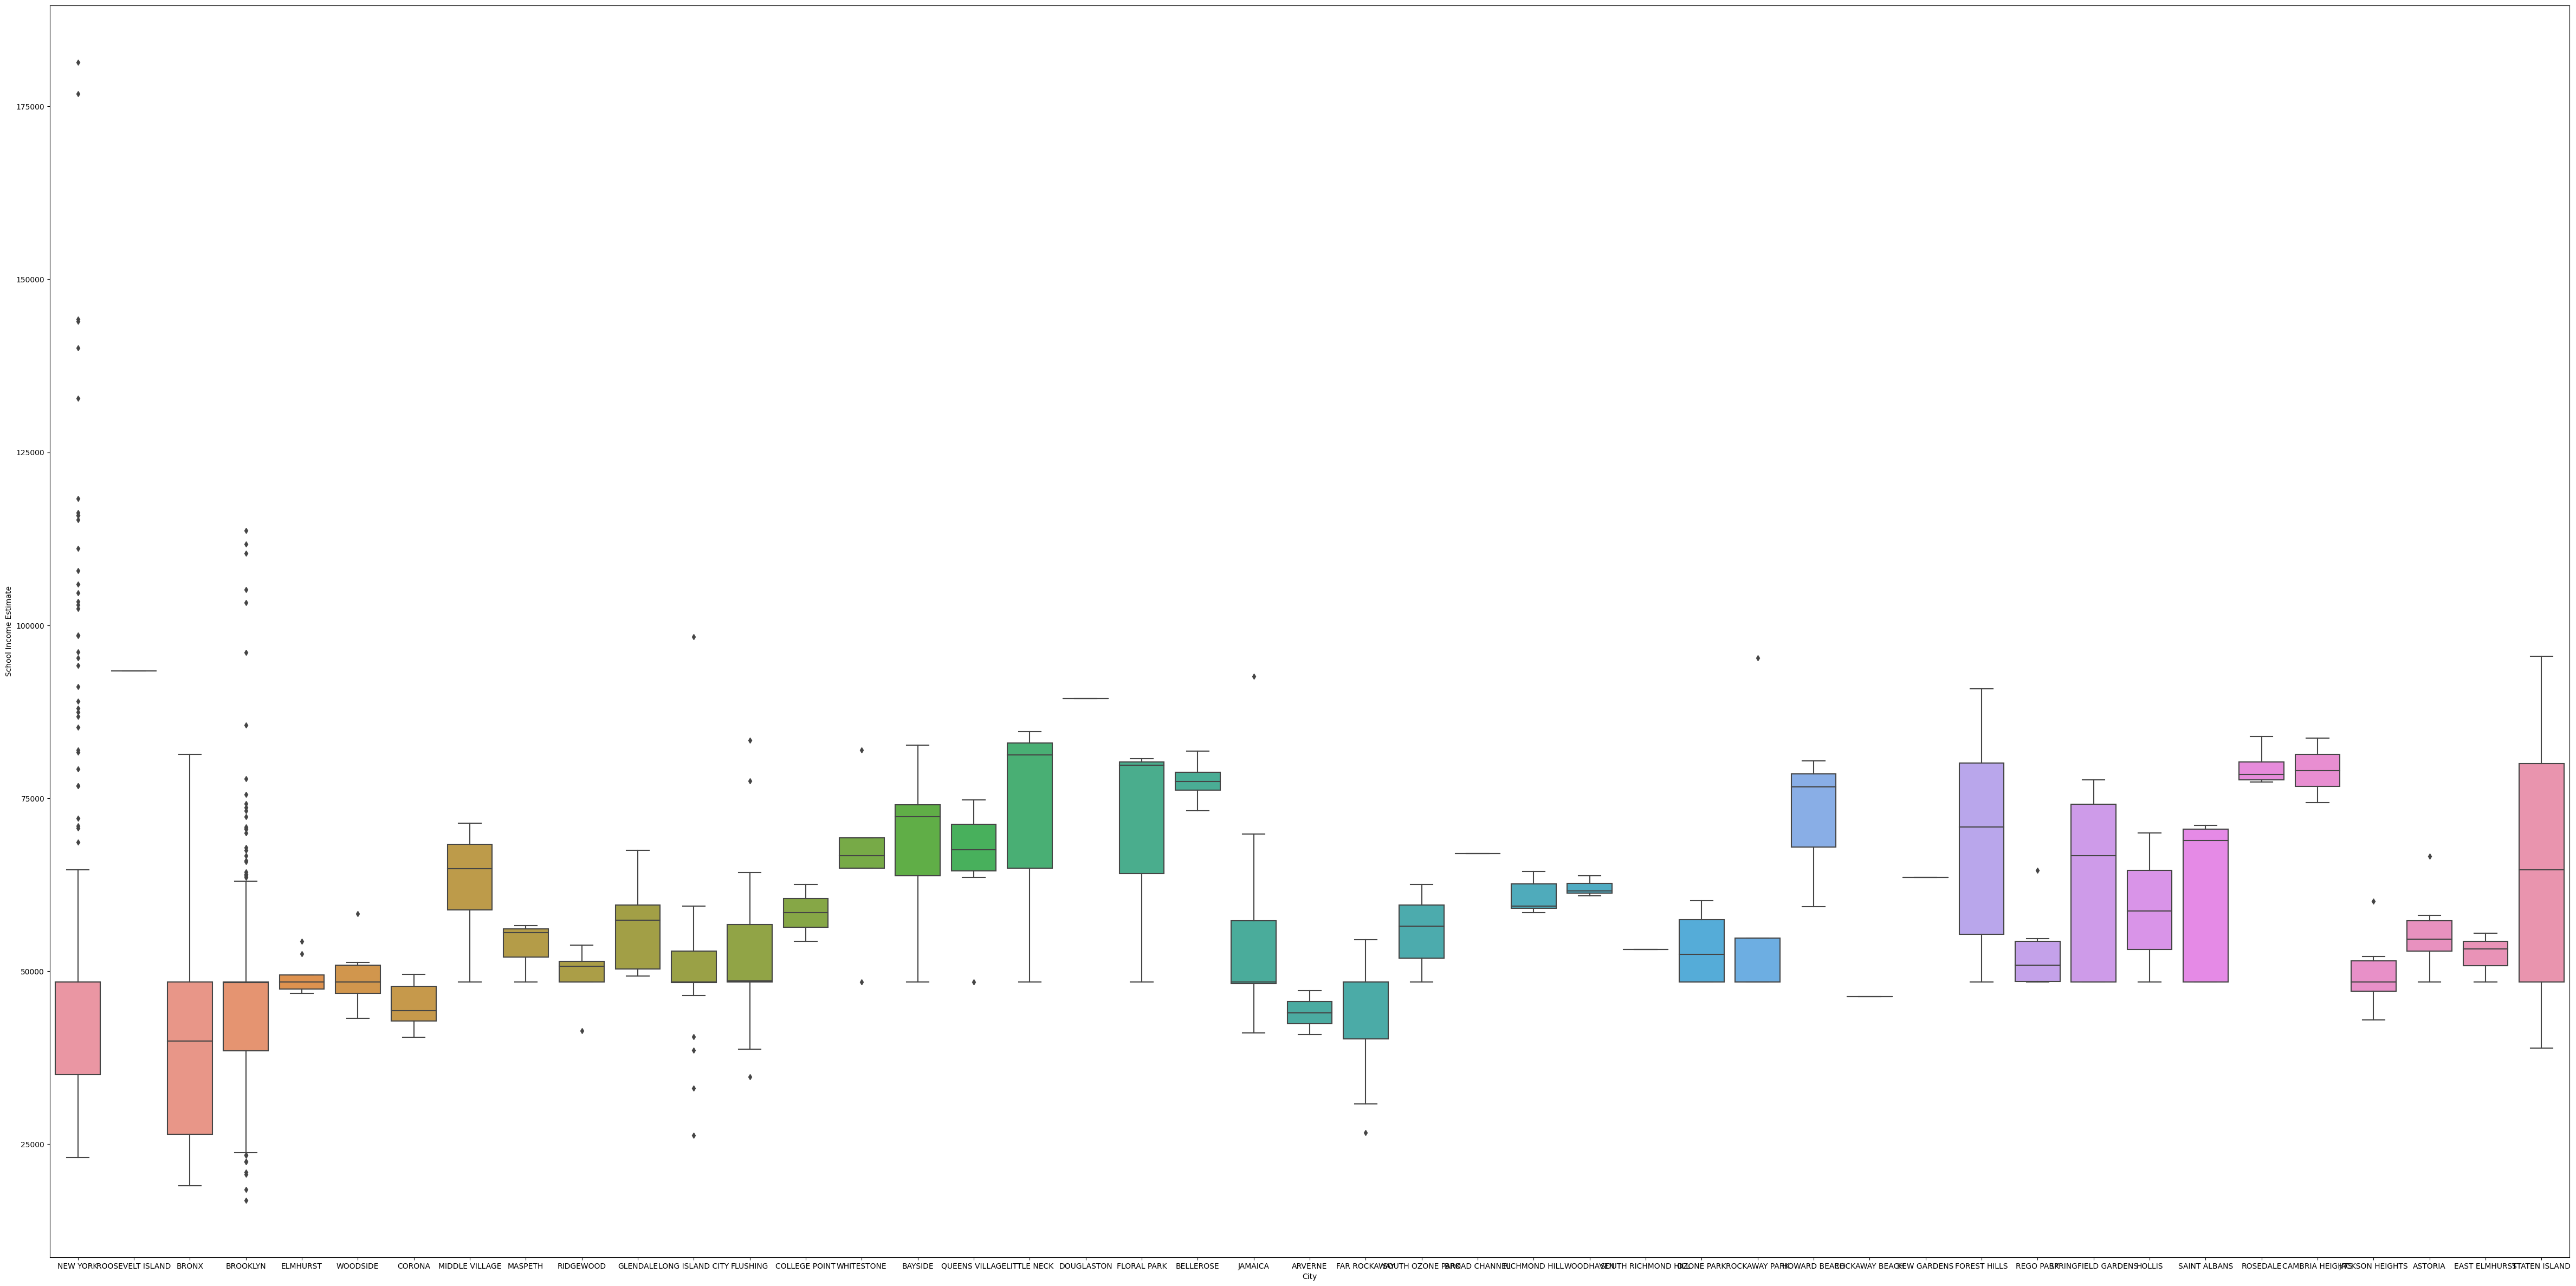

In [47]:
city_groups = dataset1.groupby('City')
plt.figure(figsize=(60,30))
sns.boxplot(x='City', y='School Income Estimate', data=dataset1,);

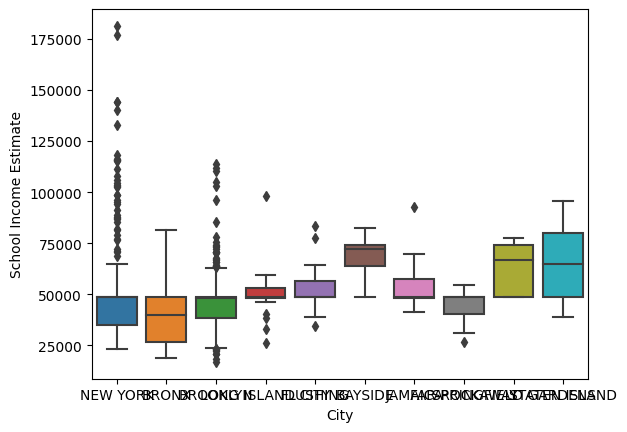

In [48]:
top_cities = dataset1['City'].value_counts().nlargest(10).index
sns.boxplot(x='City', y='School Income Estimate', data=dataset1[dataset1['City'].isin(top_cities)]);

In [49]:
mean_income = dataset1["School Income Estimate"].mean()
dataset1["School Income Estimate"].fillna(mean_income, inplace=True)


cities_with_min_income = dataset1[dataset1['School Income Estimate'].groupby(dataset1['City']).quantile(.25) >= 50000].City.unique()

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
cities_with_more_schools = dataset1['City'].value_counts().sort_values(ascending=False).head(10)

cities_with_min_income = dataset1.groupby('City')['School Income Estimate'].quantile(.25).sort_values(ascending=False).head(10)

cities_with_min_income = cities_with_min_income[cities_with_min_income >= 50000]
cities_with_min_income

City
ROOSEVELT ISLAND    93388.060000
DOUGLASTON          89380.410000
ROSEDALE            77663.620000
CAMBRIA HEIGHTS     76680.837500
BELLEROSE           76180.132500
HOWARD BEACH        67979.830000
BROAD CHANNEL       67021.510000
WHITESTONE          64911.920000
LITTLE NECK         64856.869247
QUEENS VILLAGE      64499.815000
Name: School Income Estimate, dtype: float64

Observaciones:

10. Utilizando el dataset "D5 SHSAT Registrations and Testers.csv", ¿qué colegios registran más estudiantes en el examen? Existen diferencias con los colegios donde más estudiantes realmente se presentan? Utiliza gráficas.

In [54]:
dataset2['Percentage of Students Registered'] = dataset2['Number of students who registered for the SHSAT'] / dataset2['Enrollment on 10/31']
dataset2['Percentage of Students Took'] = dataset2['Number of students who took the SHSAT'] / dataset2['Enrollment on 10/31']

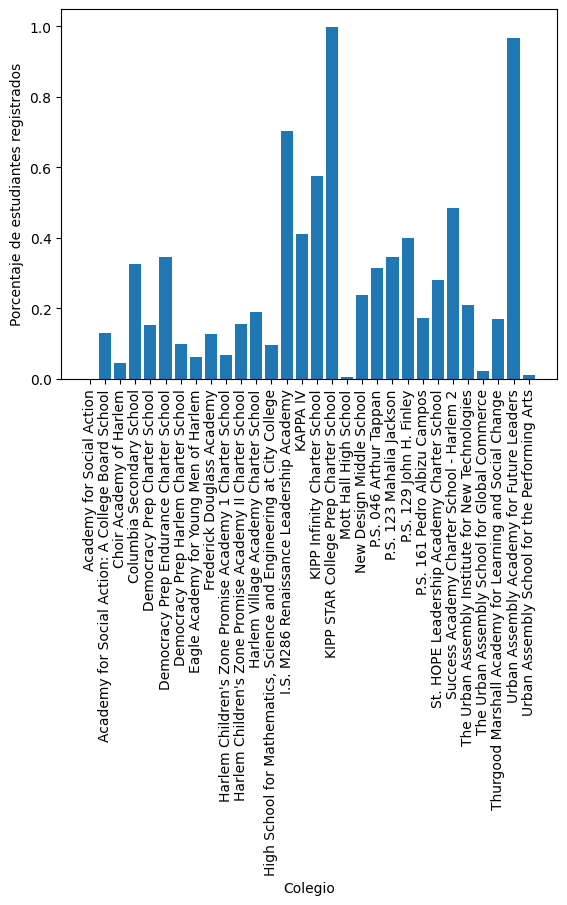

In [61]:

dataset2['Registration Rate'] = dataset2['Number of students who registered for the SHSAT'] / dataset2['Enrollment on 10/31']
grouped = dataset2.groupby('School name')['Registration Rate'].mean()
plt.xticks(rotation=90)
plt.bar(grouped.index, grouped.values)
plt.xlabel('Colegio')
plt.ylabel('Porcentaje de estudiantes registrados')
plt.show()

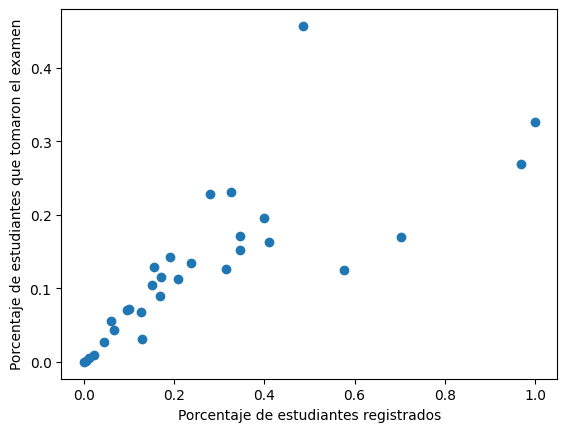

In [62]:

dataset2['Participation Rate'] = dataset2['Number of students who took the SHSAT'] / dataset2['Enrollment on 10/31']

grouped = dataset2.groupby('School name')[['Registration Rate', 'Participation Rate']].mean()

plt.scatter(grouped['Registration Rate'], grouped['Participation Rate'])
plt.xlabel('Porcentaje de estudiantes registrados')
plt.ylabel('Porcentaje de estudiantes que tomaron el examen')
plt.show()

Observaciones:

11. Escribe en un README.md las conclusiones finales del análisis:
    * Contexto del análisis y pasos realizados.
    * Validación de las hipótesis.
    * Futuros pasos.



12. Crea una presentación donde resumas el trabajo realizado del EDA en un power point o herramienta similar. El lunes 23 realizarás una presentación a los profesores por google meet a las 16.00.

13. Sube tu trabajo a un repositorio de github:
    * Este jupyter con los apartados resueltos.
    * El README.md
    * Todos los recursos necesarios para el EDA: ficheros, scripts, notebooks, imagenes,... 
    * La presentación

14. Sube al classroom el repositorio. Fecha límite lunes 23 de enero a las 9.00h. 